In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib

# Load the dataset
df = pd.read_csv(r'C:\vs\carprice\Total_cars_data.csv', low_memory=False)

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Helper function to convert price from various formats to float
def convert_price(price):
    try:
        price = str(price).replace('₹', '').replace(',', '').strip()
        if 'Lakh' in price:
            return float(price.replace('Lakh', '').strip()) * 100000
        else:
            return float(price)
    except ValueError:
        return np.nan

# Apply conversion function to the 'price' column
df['price'] = df['price'].apply(convert_price)

# Clean the 'km' column by removing commas and converting to integers
df['Kms Driven'] = df['Kms Driven'].str.replace('Kms', '').str.replace(',', '').astype(float)

# Fill missing values for numerical columns
df.fillna({
    'price': df['price'].median(),
    'ownerNo': df['ownerNo'].median(),
    'Kms Driven': df['Kms Driven'].median()
}, inplace=True)

#Convert the column to numeric: remove the ' kmpl' part and convert it into a float
df['Mileage'] = df['Mileage'].str.extract(r'(\d+\.\d+)').astype(float)

# Label Encoding for categorical variables
label_encoders = {}
def label_encode(df, columns):
    global label_encoders
    for col in columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
    return df

categorical_columns = ['ft', 'bt', 'transmission', 'model', 'variantName', 'City']
df = label_encode(df, categorical_columns)

# Normalizing numerical features using Min-Max Scaling, excluding 'price'
scalers = {}
def min_max_scaling(df, columns):
    global scalers
    for col in columns:
        if col in df.columns:
            scaler = MinMaxScaler()
            df[col] = scaler.fit_transform(df[[col]])
            scalers[col] = scaler
    return df

df = min_max_scaling(df, ['km', 'modelYear', 'ownerNo', 'Mileage', 'Seats_1'])

# Removing outliers using IQR for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Save the cleaned data
df.to_csv(r'C:\vs\carprice\car_dekho_cleaned_dataset.csv', index=False)

# Save preprocessing steps
joblib.dump(label_encoders, r'C:\vs\carprice\label_encoders.pkl')
joblib.dump(scalers, r'C:\vs\carprice\scalers.pkl')
#joblib.dump(pipeline,r'C:\vs\carprice\pipeline.pkl')

print("Data cleaning complete. Cleaned dataset saved as 'car_dekho_cleaned_dataset.csv'.")

Data cleaning complete. Cleaned dataset saved as 'car_dekho_cleaned_dataset.csv'.


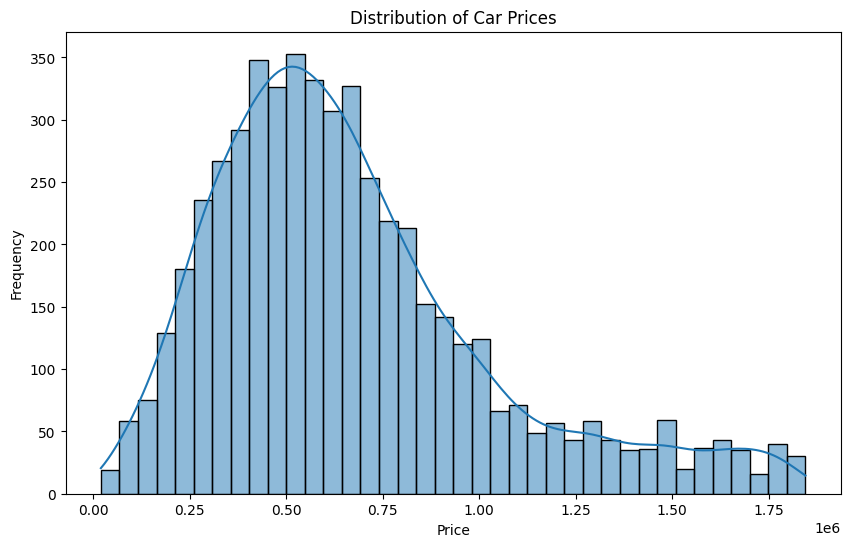

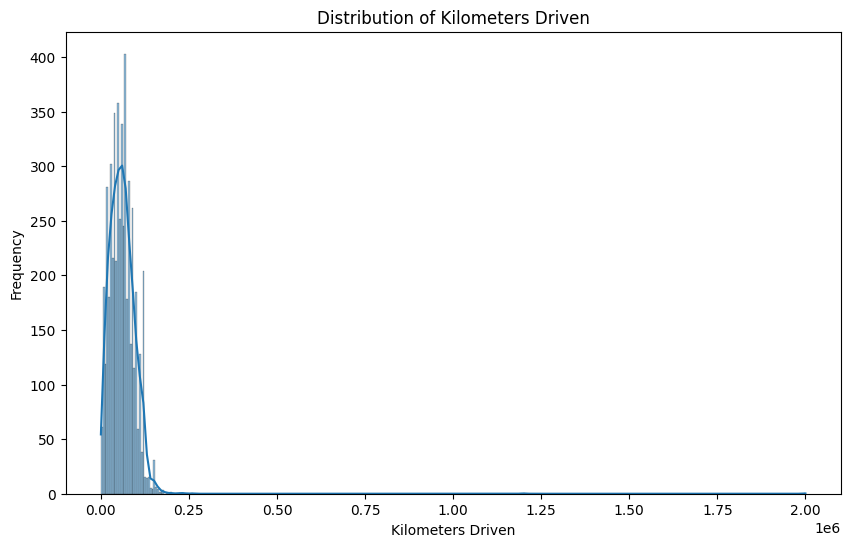

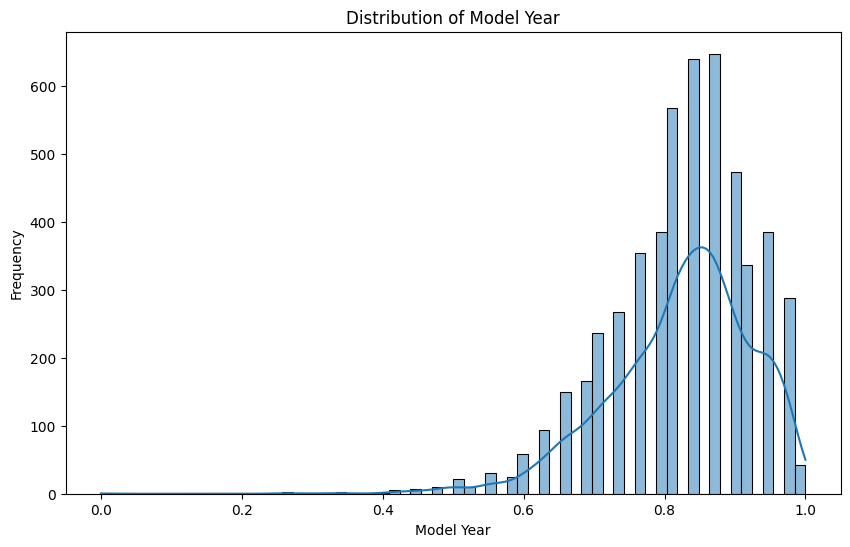

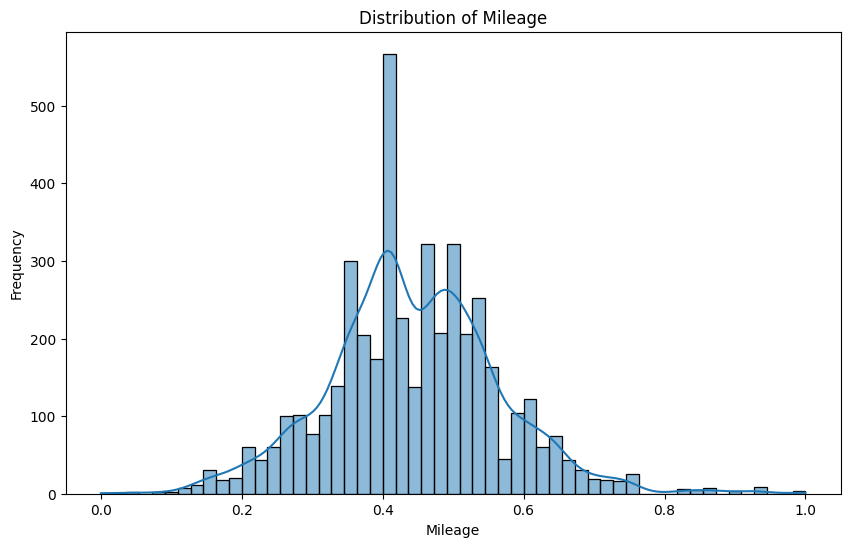

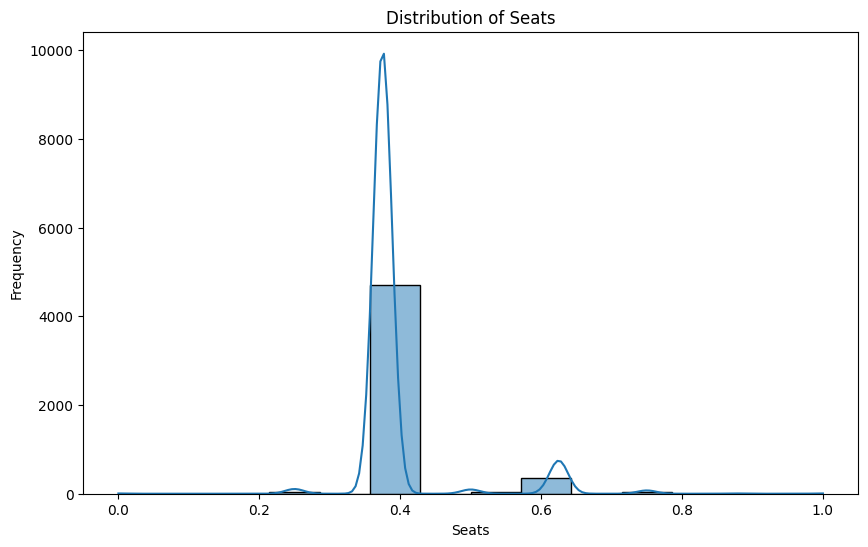

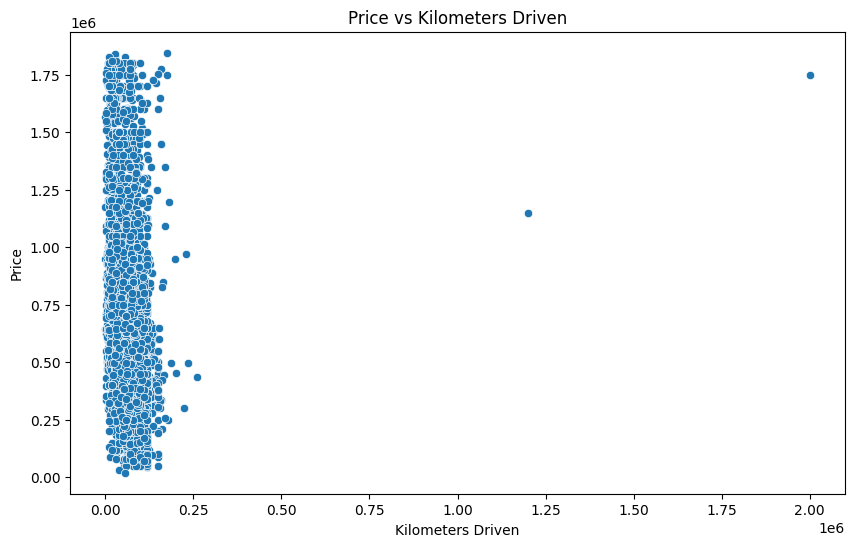

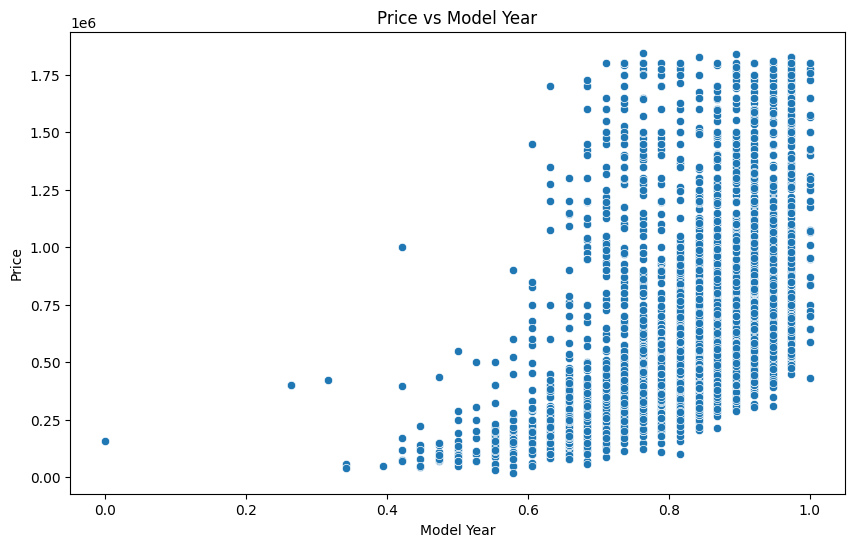

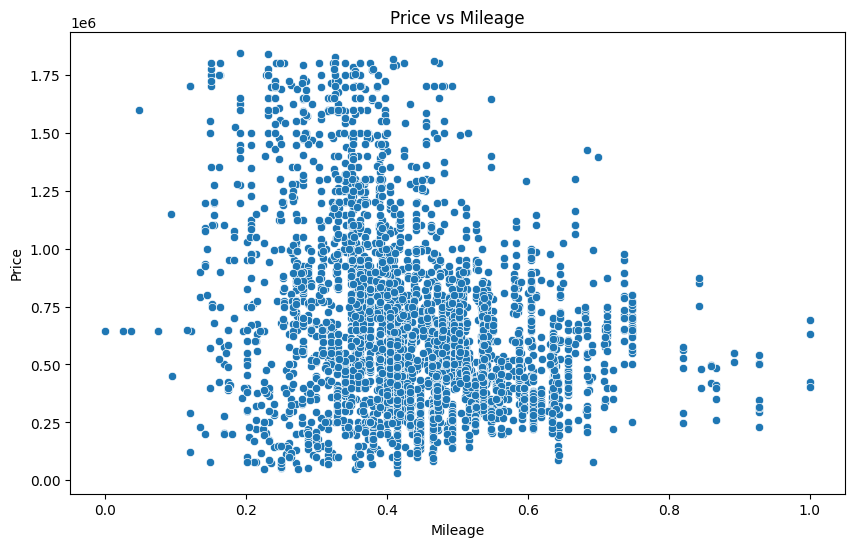

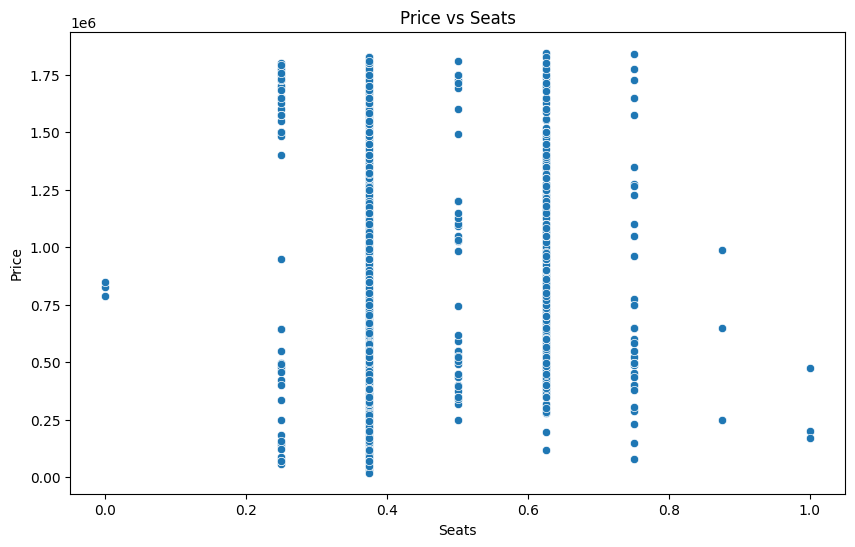

In [3]:
## Exploratory Data Analysis: Plots
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned dataset with scaling
df_scaled = pd.read_csv(r'C:\vs\carprice\car_dekho_cleaned_dataset.csv')

# Distribution Plot for Price
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Distribution Plot for Kilometers Driven
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['Kms Driven'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

# Distribution Plot for Model Year
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['modelYear'], kde=True)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

# Distribution Plot for Mileage
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['Mileage'], kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

# Distribution Plot for Seats
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['Seats_1'], kde=True)
plt.title('Distribution of Seats')
plt.xlabel('Seats')
plt.ylabel('Frequency')
plt.show()


# Scatter Plot of Price vs Kilometers Driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kms Driven', y='price', data=df_scaled)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

# Scatter Plot of Price vs Model Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='modelYear', y='price', data=df_scaled)
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

# Scatter Plot of Price vs Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='price', data=df_scaled)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Scatter Plot of Price vs Seats
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seats_1', y='price', data=df_scaled)
plt.title('Price vs Seats')
plt.xlabel('Seats')
plt.ylabel('Price')
plt.show()

In [37]:
###Train-Test Split For Cleaned Dataset
from sklearn.model_selection import train_test_split
# Assuming df is the preprocessed DataFrame
X = df[['ft', 'bt', 'Kms Driven', 'transmission', 'ownerNo','oem', 'model', 'modelYear','City','Mileage', 'Seats_1']]
y = df['price']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the lengths of the train and test datasets
print("X_train length:", len(X_train))
print("X_test length:", len(X_test))
print("y_train length:", len(y_train))
print("y_test length:", len(y_test))

X_train length: 4168
X_test length: 1042
y_train length: 4168
y_test length: 1042


Linear Regression CV Mean MSE: 54566673071.5965
Linear Regression - MSE: 47328740981.199745, MAE: 157842.62410273598, R²: 0.6344975995985901


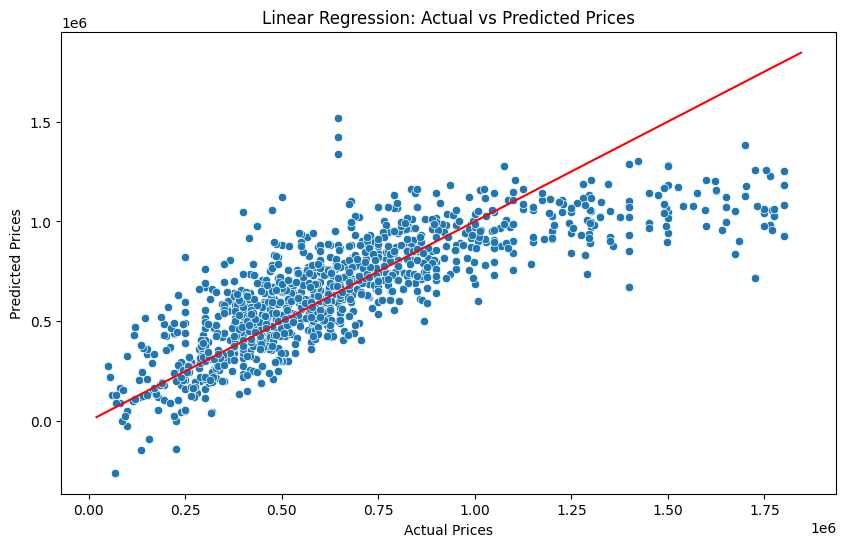

Best Ridge Alpha: {'alpha': 0.01}


c:\vs\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.443e+12, tolerance: 4.595e+10
  model = cd_fast.enet_coordinate_descent(
c:\vs\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.820e+11, tolerance: 4.496e+10
  model = cd_fast.enet_coordinate_descent(
c:\vs\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.557e+12, tolerance: 4.526e+10
  model = cd_fast.enet_coo

Best Lasso Alpha: {'alpha': 0.01}


c:\vs\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+12, tolerance: 5.658e+10
  model = cd_fast.enet_coordinate_descent(


In [38]:
###Linear Regression with Cross-Validation and Regularization (Grid Search for Ridge and Lasso)

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\vs\carprice\car_dekho_cleaned_dataset.csv')

# Define features and target
X = df[['ft', 'bt', 'Kms Driven', 'transmission','ownerNo', 'oem', 'model', 'modelYear', 'City', 'Mileage', 'Seats_1']]
y = df['price']

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Cross-Validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression CV Mean MSE: {-cv_scores.mean()}')

# Model Prediction
y_pred_lr = lr_model.predict(X_test)

# Model Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning for Ridge and Lasso using Grid Search
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print(f'Best Ridge Alpha: {ridge_grid.best_params_}')

lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print(f'Best Lasso Alpha: {lasso_grid.best_params_}')

Gradient Boosting CV Mean MSE: 26560090946.27401
Gradient Boosting - MSE: 22532212693.779305, MAE: 102724.21300652357, R²: 0.825992036652679


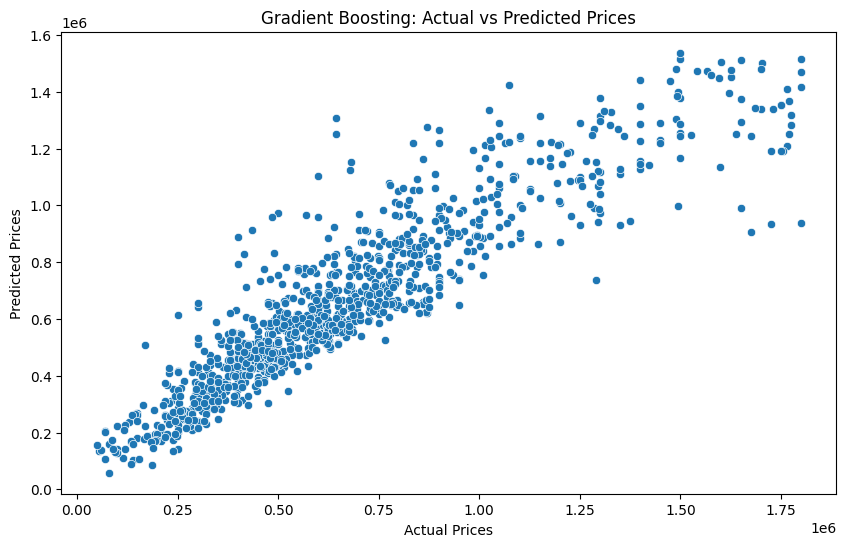

Best Gradient Boosting Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05}


In [39]:
###Gradient Boosting with Cross-Validation and Hyperparameter Tuning (Random Search)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Cross-Validation
gbr_cv_scores = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Gradient Boosting CV Mean MSE: {-gbr_cv_scores.mean()}')

# Model Prediction
y_pred_gbr = gbr_model.predict(X_test)

# Model Evaluation
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting - MSE: {mse_gbr}, MAE: {mae_gbr}, R²: {r2_gbr}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
gbr_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
gbr_random = RandomizedSearchCV(gbr_model, gbr_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
gbr_random.fit(X_train, y_train)

print(f'Best Gradient Boosting Params: {gbr_random.best_params_}')

Decision Tree CV Mean MSE: 48461076624.47606
Decision Tree - MSE: 42919599056.47722, MAE: 146292.2753934029, R²: 0.6685477755336889


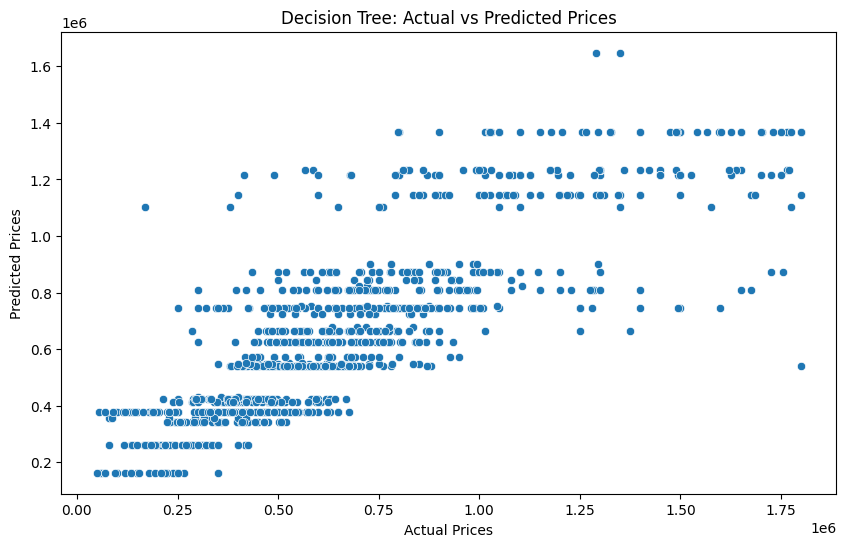

Best Decision Tree Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [40]:
###Decision Tree with Cross-Validation and Hyperparameter Tuning (Grid Search)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Pruning
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Cross-Validation
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Decision Tree CV Mean MSE: {-dt_cv_scores.mean()}')

# Model Prediction
y_pred_dt = dt_model.predict(X_test)

# Model Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - MSE: {mse_dt}, MAE: {mae_dt}, R²: {r2_dt}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Grid Search
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)

print(f'Best Decision Tree Params: {dt_grid.best_params_}')

Random Forest CV Mean MSE: 19141923641.458736
Random Forest - MSE: 15985888535.828398, MAE: 80418.70754821313, R²: 0.8765468822693676


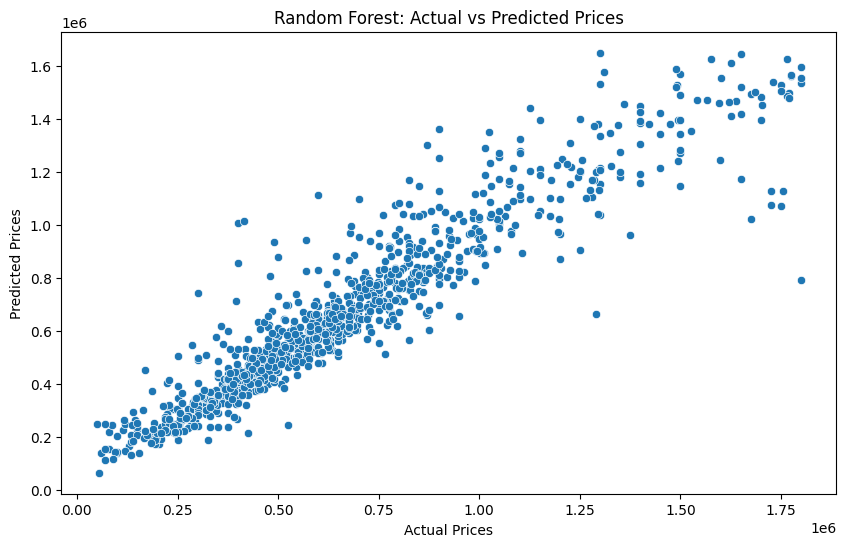

Best Random Forest Params: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}


In [41]:
###Random Forest with Cross-Validation and Hyperparameter Tuning (Random Search)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training with Bagging
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model Prediction
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(rf_model, rf_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)

print(f'Best Random Forest Params: {rf_random.best_params_}')

In [42]:
###Summary and Comparison Table

import pandas as pd

# Store model evaluation metrics
model_results = {
    'Model': ['Linear Regression', 'Gradient Boosting', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_gbr, mse_dt, mse_rf],
    'MAE': [mae_lr, mae_gbr, mae_dt, mae_rf],
    'R²': [r2_lr, r2_gbr, r2_dt, r2_rf]
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(model_results)

# Display the Model Comparison Table
print("Model Comparison Table:")
print(comparison_df)

# Identify the best model based on the highest R² and the lowest MSE/MAE
best_model_idx = comparison_df['R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_model_mse = comparison_df.loc[best_model_idx, 'MSE']
best_model_mae = comparison_df.loc[best_model_idx, 'MAE']
best_model_r2 = comparison_df.loc[best_model_idx, 'R²']

# Print the summary of the best model
print("\nBest Model Summary:")
print(f"Best Model: {best_model_name}")
print(f"MSE: {best_model_mse}")
print(f"MAE: {best_model_mae}")
print(f"R²: {best_model_r2}")

Model Comparison Table:
               Model           MSE            MAE        R²
0  Linear Regression  4.732874e+10  157842.624103  0.634498
1  Gradient Boosting  2.253221e+10  102724.213007  0.825992
2      Decision Tree  4.291960e+10  146292.275393  0.668548
3      Random Forest  1.598589e+10   80418.707548  0.876547

Best Model Summary:
Best Model: Random Forest
MSE: 15985888535.828398
MAE: 80418.70754821313
R²: 0.8765468822693676


Random Forest CV Mean MSE: 16251684409.631222
Random Forest - MSE: 15377046066.860762, MAE: 79267.83496641075, R²: 0.8812487479700079
Training Time: 319.512140750885 seconds
Prediction Time: 0.11561870574951172 seconds
Older Cars - MSE: 4738506750.040614, MAE: 39323.75184866557, R²: 0.9647679502696079


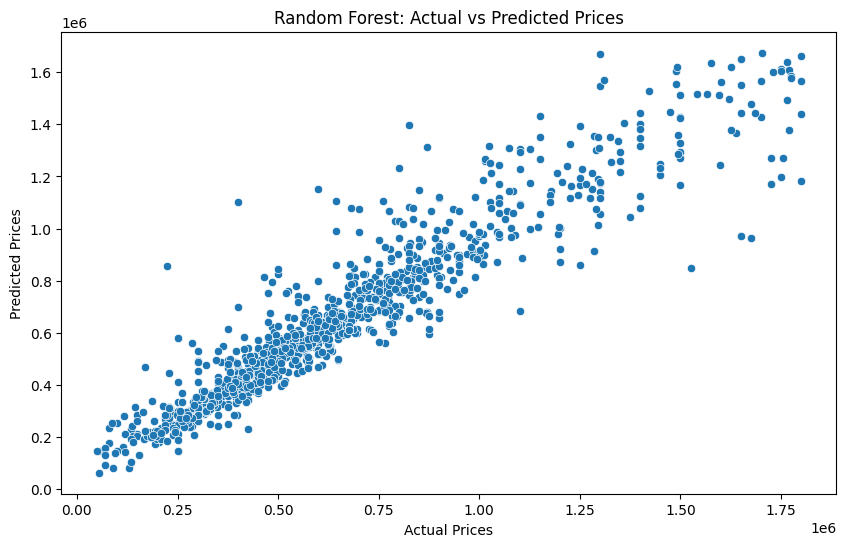

Model training complete. Model saved as 'car_price_prediction_model.pkl'.


In [46]:
###Finalized Model Training :

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import time

# Load dataset
data = pd.read_csv(r'C:\vs\carprice\car_dekho_cleaned_dataset.csv')

# Load preprocessing steps
label_encoders = joblib.load(r'C:\vs\carprice\label_encoders.pkl')
scalers = joblib.load(r'C:\vs\carprice\scalers.pkl')

# Feature Engineering
data['car_age'] = 2024 - data['modelYear']
brand_popularity = data.groupby('oem')['price'].mean().to_dict()
data['brand_popularity'] = data['oem'].map(brand_popularity)
data['mileage_normalized'] = data['Mileage'] / data['car_age']

# Define features and target
features = ['ft', 'bt', 'Kms Driven', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'City', 'Mileage', 'Seats_1', 'car_age', 'brand_popularity', 'mileage_normalized']
X = data[features]
y = data['price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model with RandomizedSearchCV for hyperparameter tuning
rf_model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

start_time = time.time()
rf_random = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)
end_time = time.time()

# Best model
best_rf_model = rf_random.best_estimator_

# Cross-Validation
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model Prediction
start_predict_time = time.time()
y_pred_rf = best_rf_model.predict(X_test)
end_predict_time = time.time()

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')
print(f'Training Time: {end_time - start_time} seconds')
print(f'Prediction Time: {end_predict_time - start_predict_time} seconds')

# Evaluate on older cars
older_cars = data[data['car_age'] > 10]  # Assuming older cars are those older than 10 years
X_older = older_cars[features]
y_older = older_cars['price']

y_pred_older = best_rf_model.predict(X_older)
mse_older = mean_squared_error(y_older, y_pred_older)
mae_older = mean_absolute_error(y_older, y_pred_older)
r2_older = r2_score(y_older, y_pred_older)

print(f'Older Cars - MSE: {mse_older}, MAE: {mae_older}, R²: {r2_older}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Save the trained model
joblib.dump(best_rf_model, r'C:\vs\carprice\car_price_prediction_model.pkl')

print("Model training complete. Model saved as 'car_price_prediction_model.pkl'.")